In [1]:
!pip install dagshub dagshub mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 51.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 86.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.0/684.0 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: dacite
    Found existing installation: dacite 1.9.2
    Uninstalling dacite-1.9.2:
      

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)

In [5]:
df.shape

(1460, 81)

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['SalePrice'])
y=df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
train_ids = X_train.pop('Id')
test_ids = X_test.pop('Id')

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    951 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          74 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuilt  

In [10]:
def custom_preprocess(df: pd.DataFrame) -> pd.DataFrame:
    # 1. Drop columns with 80% or more missing values
    threshold = 0.8
    null_fraction = df.isnull().mean()
    cols_to_drop = null_fraction[null_fraction >= threshold].index
    df = df.drop(columns=cols_to_drop)

    # 2. Separate numerical and categorical columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categoric_cols = df.select_dtypes(include=['object']).columns

    # 3. Fill numeric NaNs with 0
    df[numeric_cols] = df[numeric_cols].fillna(0)

    # 4. Fill categoric NaNs with "NO"
    df[categoric_cols] = df[categoric_cols].fillna("NO")

    return df

In [11]:
X_train_cleaned = custom_preprocess(X_train.copy())
X_test_cleaned = custom_preprocess(X_test.copy())

In [12]:
cat_cols = [col for col in X_train_cleaned.columns if X_train_cleaned[col].dtype == 'object']
num_cols = [col for col in X_train_cleaned.columns if X_train_cleaned[col].dtype != 'object']

In [13]:
s = X_train_cleaned[cat_cols].nunique()

In [14]:
s

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [15]:
threshold = 3

woe_columns = list(s[s > threshold].index)
one_hot_columns = list(s[s <= threshold].index)

In [16]:
 X_train_cleaned[woe_columns].mode().T[0].to_dict()

{'MSZoning': 'RL',
 'LotShape': 'Reg',
 'LandContour': 'Lvl',
 'LotConfig': 'Inside',
 'Neighborhood': 'NAmes',
 'Condition1': 'Norm',
 'Condition2': 'Norm',
 'BldgType': '1Fam',
 'HouseStyle': '1Story',
 'RoofStyle': 'Gable',
 'RoofMatl': 'CompShg',
 'Exterior1st': 'VinylSd',
 'Exterior2nd': 'VinylSd',
 'MasVnrType': 'NO',
 'ExterQual': 'TA',
 'ExterCond': 'TA',
 'Foundation': 'PConc',
 'BsmtQual': 'TA',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'Unf',
 'BsmtFinType2': 'Unf',
 'Heating': 'GasA',
 'HeatingQC': 'Ex',
 'Electrical': 'SBrkr',
 'KitchenQual': 'TA',
 'Functional': 'Typ',
 'FireplaceQu': 'NO',
 'GarageType': 'Attchd',
 'GarageFinish': 'Unf',
 'GarageQual': 'TA',
 'GarageCond': 'TA',
 'SaleType': 'WD',
 'SaleCondition': 'Normal'}

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, woe_columns, one_hot_columns):
        self.woe_columns = woe_columns # Columns Which Should Be Preprocessed Using WOE
        self.one_hot_columns = one_hot_columns # Columns Which Should Be Preprocessed Using One Hot Encoder

    def fit(self, X, y):
        # Generate Fill Na Values Just in Case
        self.woe_columns_fill_na = X[woe_columns].mode().T[0].to_dict()
        
        df_woe = X.copy()
        target_col = 'target'
        df_woe[target_col] = y

        woe_mappings = {}
        iv_values = {}
        
        for col in self.woe_columns:
            print(f"Processing {col}...")
            
            groups = df_woe.groupby([col])[target_col].agg(['count', 'sum'])
            groups.columns = ['n_obs', 'n_pos']
            groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
            groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
            groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
            groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']
            
            groups.replace([np.inf, -np.inf], 0, inplace=True)
            groups.fillna(0, inplace=True)
            
            woe_dict = groups['woe'].to_dict()
            iv = groups['iv'].sum()
            
            woe_mappings[col] = woe_dict
            iv_values[col] = iv

        self.woe_mappings = woe_mappings
        self.iv_values = iv_values

        return self


    def transform(self, X):
        X_transformed = X.copy()

        # Preprocess WOE Columns
        print("***")
        print("Preprocessing WOE Columns")
        for col in self.woe_columns:
            X_transformed[f'{col}_woe'] = X_transformed[col].map(self.woe_mappings[col])
            X_transformed.drop(columns=col, inplace=True)

        print("Preprocessing One Hot Columns")
        X_transformed = pd.get_dummies(X_transformed, columns=self.one_hot_columns, drop_first=True, dummy_na=True, dtype=int)

        print("Check Nans")
        n = X_transformed.isna().mean()

        na_cols = list(n[n > 0].index)

        print(na_cols)

        for col in na_cols:
            name, pr = col.split("_")
            if pr != "woe":
                print("Error Related to Nans")

            dic = self.woe_columns_fill_na
            mappings = self.woe_mappings
            X_transformed[col] = X_transformed[col].fillna(mappings[name][dic[name]])

            print(col, name, pr, dic[name], mappings[name][dic[name]])
            
        return X_transformed

In [18]:
preprocessor = CustomPreprocessor(woe_columns=woe_columns, one_hot_columns=one_hot_columns)

In [19]:
X_train_t = preprocessor.fit_transform(X_train_cleaned, y_train)
X_test_t = preprocessor.transform(X_test_cleaned)

Processing MSZoning...
Processing LotShape...
Processing LandContour...
Processing LotConfig...
Processing Neighborhood...
Processing Condition1...
Processing Condition2...
Processing BldgType...
Processing HouseStyle...
Processing RoofStyle...
Processing RoofMatl...
Processing Exterior1st...
Processing Exterior2nd...
Processing MasVnrType...
Processing ExterQual...
Processing ExterCond...
Processing Foundation...
Processing BsmtQual...
Processing BsmtCond...
Processing BsmtExposure...
Processing BsmtFinType1...
Processing BsmtFinType2...
Processing Heating...
Processing HeatingQC...
Processing Electrical...
Processing KitchenQual...
Processing Functional...
Processing FireplaceQu...
Processing GarageType...
Processing GarageFinish...
Processing GarageQual...
Processing GarageCond...
Processing SaleType...
Processing SaleCondition...
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
[]
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['RoofMat

In [20]:
X_corr = X_train_t.copy()
X_corr['SalePrice'] = y_train

In [21]:
corr_matrix = X_corr.corr().abs()

In [22]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Find feature pairs with correlation greater than a threshold
threshold = 0.8
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display highly correlated pairs
if high_corr_pairs:
    print("Highly correlated feature pairs:")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} and {feat2}: {corr:.4f}")
else:
    print(f"No feature pairs with correlation above {threshold} found.")

# To remove one feature from each highly correlated pair
# (typically the one with lower correlation with target)
features_to_drop = []
for feat1, feat2, _ in high_corr_pairs:
    # Compare correlation with target
    if abs(X_train_t[feat1].corr(y)) < abs(X_train_t[feat2].corr(y)):
        features_to_drop.append(feat1)
    else:
        features_to_drop.append(feat2)

# Remove duplicates
features_to_drop = list(set(features_to_drop))
print(f"Features to drop due to high correlation: {features_to_drop}")

Highly correlated feature pairs:
TotalBsmtSF and 1stFlrSF: 0.8274
GrLivArea and TotRmsAbvGrd: 0.8207
Fireplaces and FireplaceQu_woe: 0.8409
GarageYrBlt and GarageQual_woe: 0.9050
GarageYrBlt and GarageCond_woe: 0.8876
GarageCars and GarageArea: 0.8825
Exterior1st_woe and Exterior2nd_woe: 0.8691
GarageQual_woe and GarageCond_woe: 0.9052
SaleType_woe and SaleCondition_woe: 0.8032
Features to drop due to high correlation: ['TotRmsAbvGrd', 'SaleCondition_woe', 'Exterior1st_woe', 'GarageQual_woe', '1stFlrSF', 'Fireplaces', 'GarageArea', 'GarageYrBlt']


Features selected by RFE:
1. MSSubClass
2. OverallQual
3. BsmtFinSF1
4. GrLivArea
5. BedroomAbvGr
6. TotRmsAbvGrd
7. GarageYrBlt
8. GarageCars
9. LandContour_woe
10. Neighborhood_woe
11. BsmtQual_woe
12. BsmtExposure_woe
13. BsmtFinType2_woe
14. KitchenQual_woe
15. GarageQual_woe


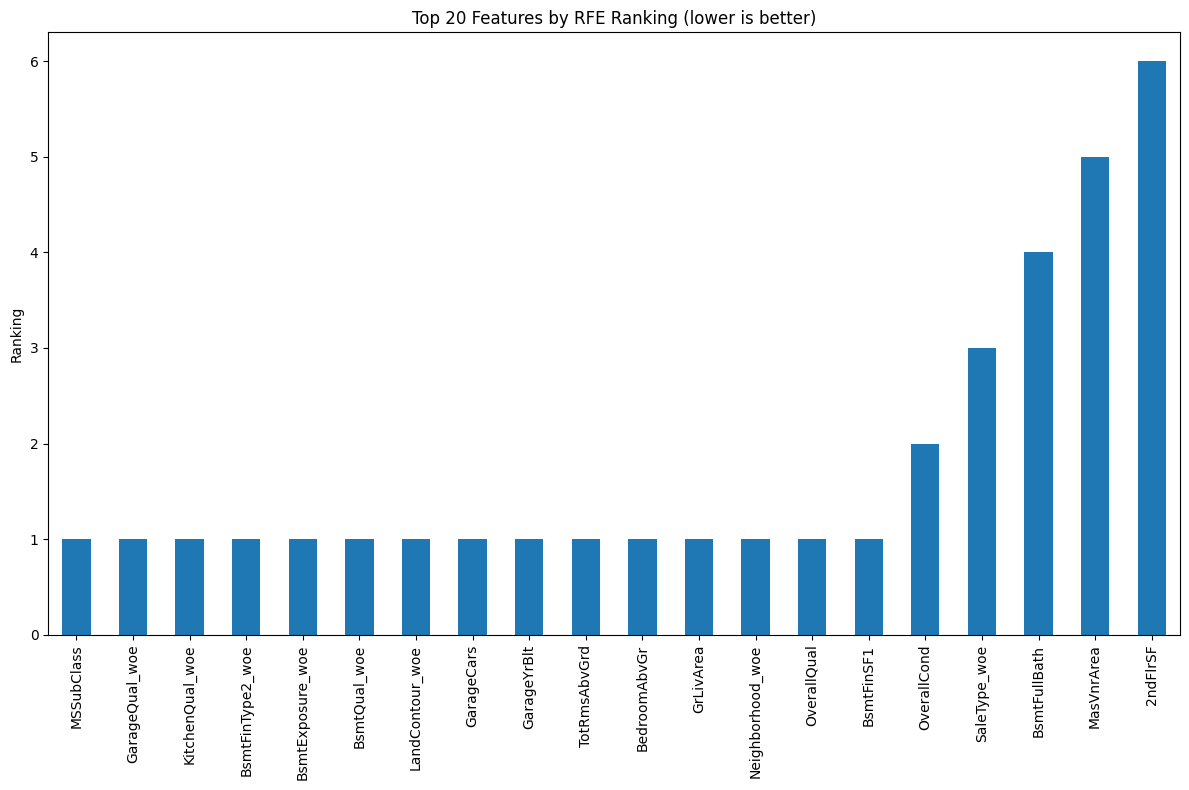

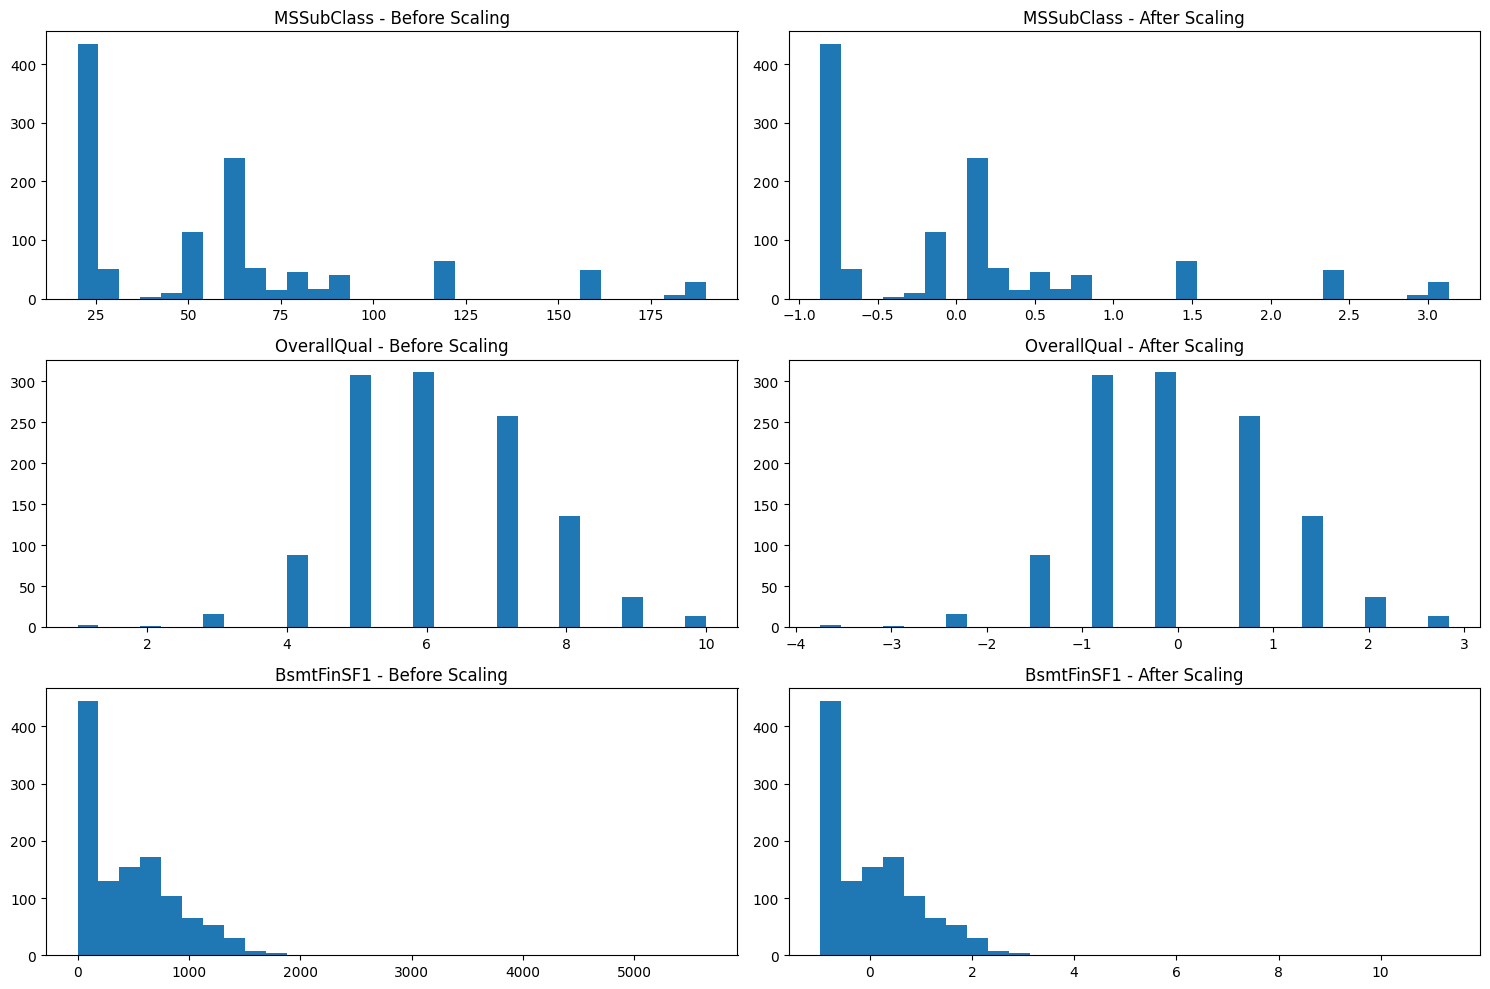

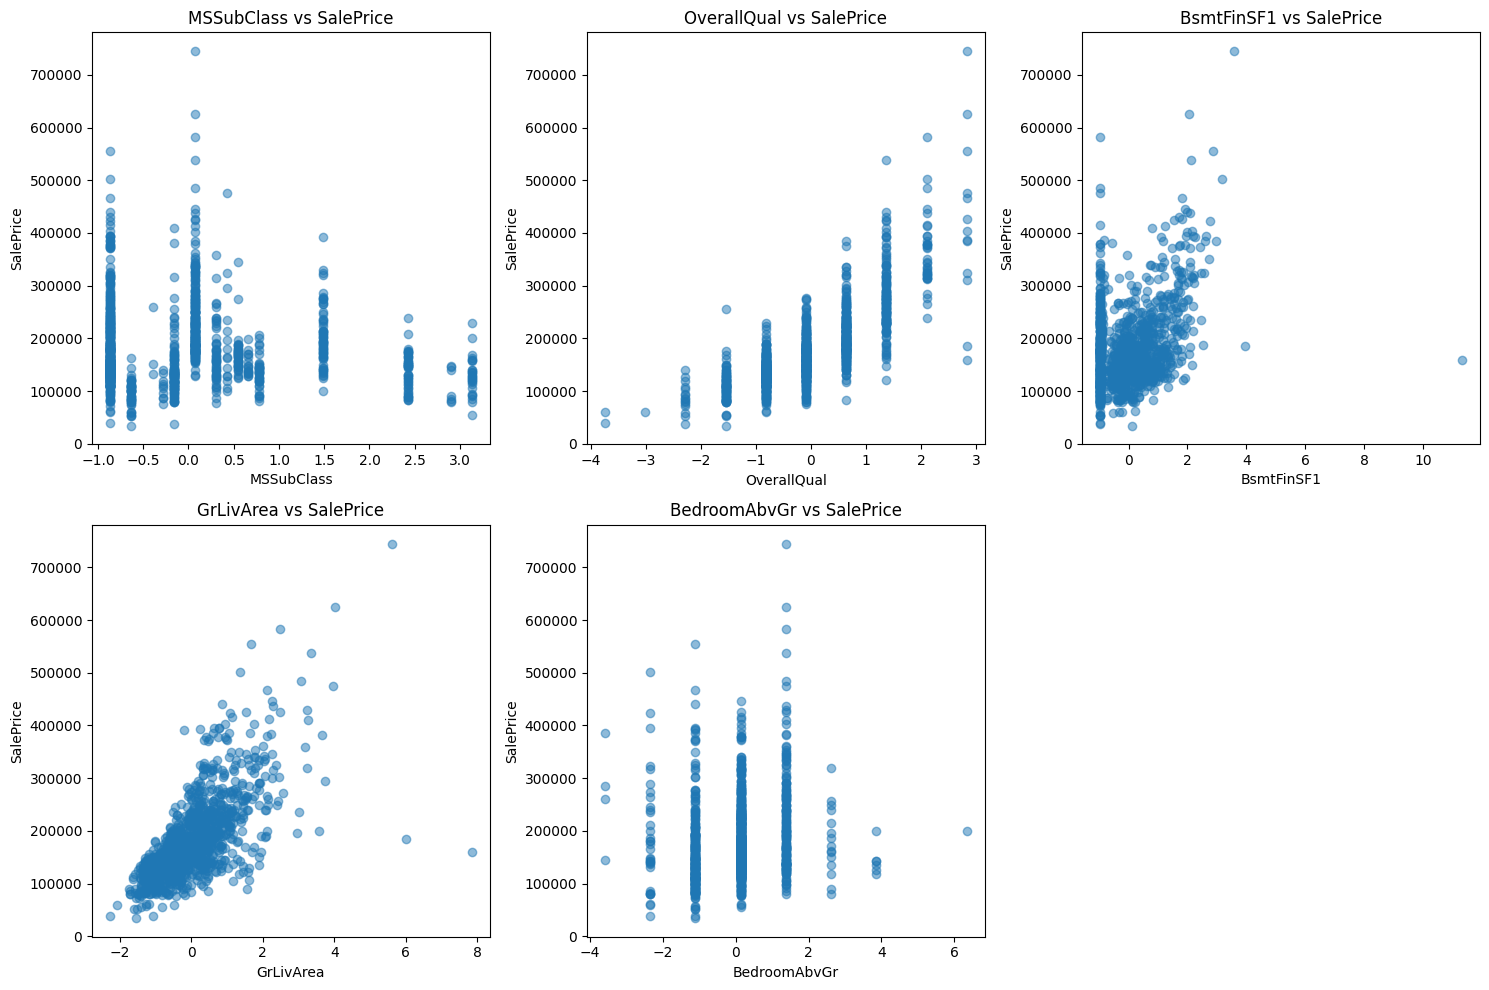

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_t),
    columns=X_train_t.columns,
    index=X_train_t.index
)

# Create and fit the model for feature selection only
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=15, step=1)
rfe.fit(X_train_scaled, y_train)

# Get selected features
rfe_selected_features = X_train_t.columns[rfe.support_].tolist()
print("Features selected by RFE:")
for i, feature in enumerate(rfe_selected_features, 1):
    print(f"{i}. {feature}")

# Create plot for feature ranking
feature_ranking = pd.Series(rfe.ranking_, index=X_train_t.columns)
plt.figure(figsize=(12, 8))
feature_ranking.sort_values().head(20).plot(kind='bar')
plt.title('Top 20 Features by RFE Ranking (lower is better)')
plt.ylabel('Ranking')
plt.tight_layout()
plt.savefig("rfe_feature_ranking.png")

# Create before/after scaling visualization for a few selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(rfe_selected_features[:3], 1):
    plt.subplot(3, 2, 2*i-1)
    plt.hist(X_train_t[feature], bins=30)
    plt.title(f'{feature} - Before Scaling')

    plt.subplot(3, 2, 2*i)
    plt.hist(X_train_scaled[feature], bins=30)
    plt.title(f'{feature} - After Scaling')

plt.tight_layout()
plt.savefig("scaling_visualization.png")

# Create scatter plots of features vs. target for top 5 features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(rfe_selected_features[:5], 1):  # Plot top 5 features
    plt.subplot(2, 3, i)
    plt.scatter(X_train_scaled[feature], y_train, alpha=0.5)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.savefig("feature_distributions.png")

# Show plots if in interactive mode
plt.show()

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

class FinalCustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, woe_columns, one_hot_columns, final_columns):
        self.woe_columns = woe_columns # Columns Which Should Be Preprocessed Using WOE
        self.one_hot_columns = one_hot_columns # Columns Which Should Be Preprocessed Using One Hot Encoder

        self.final_columns = final_columns # Columns Selected By RFE

    def fit(self, X, y):
        # Generate Fill Na Values Just in Case
        self.woe_columns_fill_na = X[woe_columns].mode().T[0].to_dict()
        
        df_woe = X.copy()
        target_col = 'target'
        df_woe[target_col] = y

        woe_mappings = {}
        iv_values = {}
        
        for col in self.woe_columns:
            print(f"Processing {col}...")
            
            groups = df_woe.groupby([col])[target_col].agg(['count', 'sum'])
            groups.columns = ['n_obs', 'n_pos']
            groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
            groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
            groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
            groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']
            
            groups.replace([np.inf, -np.inf], 0, inplace=True)
            groups.fillna(0, inplace=True)
            
            woe_dict = groups['woe'].to_dict()
            iv = groups['iv'].sum()
            
            woe_mappings[col] = woe_dict
            iv_values[col] = iv

        self.woe_mappings = woe_mappings
        self.iv_values = iv_values

        return self


    def transform(self, X):
        X_transformed = X.copy()

        # Preprocess WOE Columns
        print("***")
        print("Preprocessing WOE Columns")
        for col in self.woe_columns:
            X_transformed[f'{col}_woe'] = X_transformed[col].map(self.woe_mappings[col])
            X_transformed.drop(columns=col, inplace=True)

        print("Preprocessing One Hot Columns")
        X_transformed = pd.get_dummies(X_transformed, columns=self.one_hot_columns, drop_first=True, dummy_na=True, dtype=int)

        print("Check Nans")
        n = X_transformed.isna().mean()

        na_cols = list(n[n > 0].index)

        print(na_cols)

        for col in na_cols:
            name, pr = col.split("_")
            if pr != "woe":
                print("Error Related to Nans")

            dic = self.woe_columns_fill_na
            mappings = self.woe_mappings
            X_transformed[col] = X_transformed[col].fillna(mappings[name][dic[name]])

            print(col, name, pr, dic[name], mappings[name][dic[name]])
            
        return X_transformed[self.final_columns]

In [25]:
final_preprocessor = FinalCustomPreprocessor(woe_columns=woe_columns, 
                                             one_hot_columns=one_hot_columns, 
                                             final_columns=rfe_selected_features)

In [26]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [27]:
X_train_clean = custom_preprocess(X_train)
X_test_clean = custom_preprocess(X_test)
test_clean = custom_preprocess(test)

In [28]:
X_test_clean.shape

(292, 75)

In [29]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemodAd

In [30]:
X_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodAdd 

In [31]:
X_test_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodAdd 

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

model_lr = LinearRegression()

pipeline_lr = Pipeline([
    ('preprocess', FinalCustomPreprocessor(woe_columns=woe_columns, 
                                           one_hot_columns=one_hot_columns, 
                                           final_columns=rfe_selected_features)),
    ('feature_selector', RFE(
        estimator=model_lr,
        n_features_to_select=60,
       step=1
     )),
    ('scaler', StandardScaler()),
    ('model', model_lr)
])

pipeline_lr.fit(X_train_clean, y_train)

preds = pipeline_lr.predict(X_test_clean)

log_preds = np.log(preds)
log_y_test = np.log(y_test)  # Assuming y_test contains the actual SalePrice values for the test set

rmse_lr = np.sqrt(mean_squared_error(log_y_test, log_preds))

# Print RMSE
print(f"RMSE: {rmse_lr}")
# Calculate Bias
bias_lr = np.mean(log_preds - log_y_test)
print(f"Bias: {bias_lr}")

# Calculate Variance
variance_lr = np.var(log_preds)
print(f"Variance: {variance_lr}")

Processing MSZoning...
Processing LotShape...
Processing LandContour...
Processing LotConfig...
Processing Neighborhood...
Processing Condition1...
Processing Condition2...
Processing BldgType...
Processing HouseStyle...
Processing RoofStyle...
Processing RoofMatl...
Processing Exterior1st...
Processing Exterior2nd...
Processing MasVnrType...
Processing ExterQual...
Processing ExterCond...
Processing Foundation...
Processing BsmtQual...
Processing BsmtCond...
Processing BsmtExposure...
Processing BsmtFinType1...
Processing BsmtFinType2...
Processing Heating...
Processing HeatingQC...
Processing Electrical...
Processing KitchenQual...
Processing Functional...
Processing FireplaceQu...
Processing GarageType...
Processing GarageFinish...
Processing GarageQual...
Processing GarageCond...
Processing SaleType...
Processing SaleCondition...
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
[]
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['RoofMat

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the pipeline with RandomForestRegressor
model_rf=RandomForestRegressor(random_state=42)
pipeline_rf = Pipeline([
    ('preprocess', FinalCustomPreprocessor(woe_columns=woe_columns, 
                                           one_hot_columns=one_hot_columns, 
                                           final_columns=rfe_selected_features)),
    ('scaler', StandardScaler()),
    ('feature_selector', RFE(
        estimator=model_rf,
        n_features_to_select=60,
        step=1
     )),
    ('model', model_rf)  # Use RandomForestRegressor
])
# Fit the model (preprocessing, scaling, and training are done inside the pipeline)
pipeline_rf.fit(X_train_clean, y_train)

# Make predictions on the test set
preds = pipeline_rf.predict(X_test_clean)

# Log-transform the predictions and actual values
log_preds = np.log(preds)
log_y_test = np.log(y_test)  # Assuming y_test contains the actual SalePrice values for the test set

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(log_y_test, log_preds))
print(f"RMSE: {rmse_rf}")

# Calculate Bias
bias_rf = np.mean(log_preds - log_y_test)
print(f"Bias: {bias_rf}")

# Calculate Variance
variance_rf = np.var(log_preds)
print(f"Variance: {variance_rf}") 


Processing MSZoning...
Processing LotShape...
Processing LandContour...
Processing LotConfig...
Processing Neighborhood...
Processing Condition1...
Processing Condition2...
Processing BldgType...
Processing HouseStyle...
Processing RoofStyle...
Processing RoofMatl...
Processing Exterior1st...
Processing Exterior2nd...
Processing MasVnrType...
Processing ExterQual...
Processing ExterCond...
Processing Foundation...
Processing BsmtQual...
Processing BsmtCond...
Processing BsmtExposure...
Processing BsmtFinType1...
Processing BsmtFinType2...
Processing Heating...
Processing HeatingQC...
Processing Electrical...
Processing KitchenQual...
Processing Functional...
Processing FireplaceQu...
Processing GarageType...
Processing GarageFinish...
Processing GarageQual...
Processing GarageCond...
Processing SaleType...
Processing SaleCondition...
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
[]
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['RoofMat

In [34]:
import dagshub
dagshub.init(repo_owner='agasi22', repo_name='machine-learning', mlflow=True)


❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=174edfe2-9aa2-4567-8c6d-e46128327292&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=25ad7cbfc4ebf7cd6831ddf25b4f74f42b58ccd5310d5dab10c3bcfa685d47e8




Output()

Accessing as agasi22

Initialized MLflow to track repo "agasi22/machine-learning"

Repository agasi22/machine-learning initialized!

In [35]:
 from sklearn.metrics import mean_squared_error

 rmse = mean_squared_error(np.log(y_test), np.log(preds), squared=False)

In [36]:
 rmse

0.15250338045064943

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the pipeline with XGBRegressor
model_xgb=XGBRegressor(random_state=42)
pipeline_xgb = Pipeline([
    ('preprocess', FinalCustomPreprocessor(woe_columns=woe_columns, 
                                           one_hot_columns=one_hot_columns, 
                                           final_columns=rfe_selected_features)),
    ('feature_selector', RFE(
         estimator=model_xgb,
         n_features_to_select=60,
         step=1
     )),
    ('scaler', StandardScaler()),
    ('model', model_xgb)  # Use XGBRegressor
])

# Fit the model (preprocessing, scaling, and training are done inside the pipeline)
pipeline_xgb.fit(X_train_clean, y_train)

# Make predictions on the test set
preds = pipeline_xgb.predict(X_test_clean)

# Log-transform the predictions and actual values
log_preds = np.log(preds)
log_y_test = np.log(y_test)  # Assuming y_test contains the actual SalePrice values for the test set

# Calculate RMSE
rmse_xgb = np.sqrt(mean_squared_error(log_y_test, log_preds))
print(f"RMSE: {rmse_xgb}")

# Calculate Bias
bias_xgb = np.mean(log_preds - log_y_test)
print(f"Bias: {bias_xgb}")

# Calculate Variance
variance_xgb = np.var(log_preds)
print(f"Variance: {variance_xgb}") 

Processing MSZoning...
Processing LotShape...
Processing LandContour...
Processing LotConfig...
Processing Neighborhood...
Processing Condition1...
Processing Condition2...
Processing BldgType...
Processing HouseStyle...
Processing RoofStyle...
Processing RoofMatl...
Processing Exterior1st...
Processing Exterior2nd...
Processing MasVnrType...
Processing ExterQual...
Processing ExterCond...
Processing Foundation...
Processing BsmtQual...
Processing BsmtCond...
Processing BsmtExposure...
Processing BsmtFinType1...
Processing BsmtFinType2...
Processing Heating...
Processing HeatingQC...
Processing Electrical...
Processing KitchenQual...
Processing Functional...
Processing FireplaceQu...
Processing GarageType...
Processing GarageFinish...
Processing GarageQual...
Processing GarageCond...
Processing SaleType...
Processing SaleCondition...
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
[]
***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['RoofMat

In [38]:
preds = pipeline_xgb.predict(test_clean)
sample_submission_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df["SalePrice"] = preds
sample_submission_df.to_csv("submission.csv", index=False)
print("Final submission file 'submission.csv' is ready!")

***
Preprocessing WOE Columns
Preprocessing One Hot Columns
Check Nans
['MSZoning_woe', 'Exterior1st_woe', 'Exterior2nd_woe', 'KitchenQual_woe', 'Functional_woe', 'SaleType_woe']
MSZoning_woe MSZoning woe RL -2.576594184662983e-07
Exterior1st_woe Exterior1st woe VinylSd -8.165153784808399e-07
Exterior2nd_woe Exterior2nd woe VinylSd -8.309587017030542e-07
KitchenQual_woe KitchenQual woe TA 1.5259522977679691e-06
Functional_woe Functional woe Typ -7.91124809204135e-08
SaleType_woe SaleType woe WD 2.0980901147020062e-07
Final submission file 'submission.csv' is ready!


# Log linear model

In [39]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize MLflow
mlflow.set_experiment('Linear Regression')

run_name = 'linear with rfe and th3'
with mlflow.start_run(run_name=run_name):
    # Log model hyperparameters
    mlflow.log_param("n_features_to_select", 60)
    mlflow.log_param("rfe_step", 1)
    mlflow.log_param("estimator", "LinearRegression")
    mlflow.log_param("scaler", "StandardScaler")

    # Log evaluation metrics
    mlflow.log_metric("rmse", rmse_lr)
    mlflow.log_metric("bias", bias_lr)
    mlflow.log_metric("variance", variance_lr)

    # Log the full pipeline model
    mlflow.sklearn.log_model(pipeline_lr, "model")

2025/04/10 19:22:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run linear with rfe and th3 at: https://dagshub.com/agasi22/machine-learning.mlflow/#/experiments/1/runs/0ef7c77983624c4b816b5ebbe566e6f8
🧪 View experiment at: https://dagshub.com/agasi22/machine-learning.mlflow/#/experiments/1


# Log Random Forest

In [40]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize MLflow
mlflow.set_experiment('Random Forest')

run_name = 'final-random forest rfe 60 features'
with mlflow.start_run(run_name=run_name):
    # Log model hyperparameters
    mlflow.log_param("n_features_to_select", 60)
    mlflow.log_param("rfe_step", 1)
    mlflow.log_param("estimator", "RandomForest")
    mlflow.log_param("scaler", "StandardScaler")

    # Log evaluation metrics
    mlflow.log_metric("rmse", rmse_rf)
    mlflow.log_metric("bias", bias_rf)
    mlflow.log_metric("variance", variance_rf)

    # Log the full pipeline model
    mlflow.sklearn.log_model(pipeline_rf, "model")

2025/04/10 19:23:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run final-random forest rfe 60 features at: https://dagshub.com/agasi22/machine-learning.mlflow/#/experiments/2/runs/4ca0655f949246f49706431bd504f3b0
🧪 View experiment at: https://dagshub.com/agasi22/machine-learning.mlflow/#/experiments/2


In [41]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize MLflow
mlflow.set_experiment('XGBRegressor')

run_name = 'XGBRegressor rfe 60 features'
with mlflow.start_run(run_name=run_name):
    # Log model hyperparameters
    mlflow.log_param("n_features_to_select", 60)
    mlflow.log_param("rfe_step", 1)
    mlflow.log_param("estimator", "RandomForest")
    mlflow.log_param("scaler", "StandardScaler")

    # Log evaluation metrics
    mlflow.log_metric("rmse", rmse_xgb)
    mlflow.log_metric("bias", bias_xgb)
    mlflow.log_metric("variance", variance_xgb)

    # Log the full pipeline model
    mlflow.sklearn.log_model(pipeline_xgb, "model")


2025/04/10 19:23:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBRegressor rfe 60 features at: https://dagshub.com/agasi22/machine-learning.mlflow/#/experiments/3/runs/8a078eb0ebe24b1fbacd6ee767a42b98
🧪 View experiment at: https://dagshub.com/agasi22/machine-learning.mlflow/#/experiments/3
